In [3]:
from f1tenth_sim.utils.track_utils import CentreLine, TrackLine
import numpy as np 
import matplotlib.pyplot as plt
import casadi as ca



In [15]:

def init_track_interpolants(centre_line, exclusion_width):
    widths = np.row_stack((centre_line.widths, centre_line.widths[1:int(centre_line.widths.shape[0] / 2), :]))
    path = np.row_stack((centre_line.path, centre_line.path[1:int(centre_line.path.shape[0] / 2), :]))
    extended_track = TrackLine(path)
    extended_track.init_path()
    extended_track.init_track()

    centre_interpolant = LineInterpolant(extended_track.path, extended_track.s_path, extended_track.psi + np.pi / 2)

    left_path = extended_track.path - extended_track.nvecs * np.clip((widths[:, 0][:, None]  - exclusion_width), 0, np.inf)
    left_interpolant = LineInterpolant(left_path, extended_track.s_path)
    right_path = extended_track.path + extended_track.nvecs * np.clip((widths[:, 1][:, None] - exclusion_width), 0, np.inf)
    right_interpolant = LineInterpolant(right_path, extended_track.s_path)

    return centre_interpolant, left_interpolant, right_interpolant


class LineInterpolant:
    def __init__(self, path, s_path, angles=None):
        self.lut_x = ca.interpolant('lut_x', 'bspline', [s_path], path[:, 0])
        self.lut_y = ca.interpolant('lut_y', 'bspline', [s_path], path[:, 1])
        if angles is not None:
            self.lut_angle = ca.interpolant('lut_angle', 'bspline', [s_path], angles)

    def get_point(self, s):
        return np.array([self.lut_x(s).full()[0, 0], self.lut_y(s).full()[0, 0]])


In [16]:
map_name = "gbr"
centre_line = CentreLine(map_name, directory="../../maps/")
centre_interpolant, left_interpolant, right_interpolant = init_track_interpolants(centre_line, 0.35)

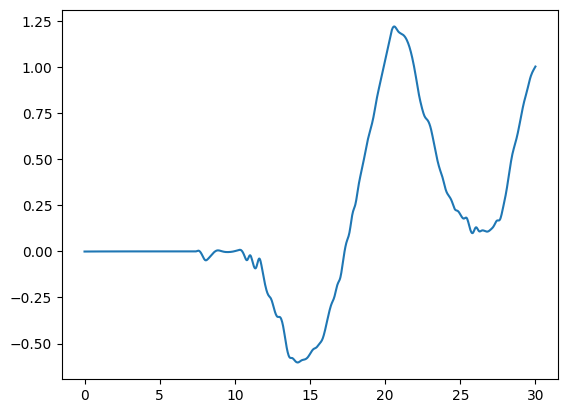

In [17]:
# s_array = np.linspace(0, centre_line.s_path[-1], 1000)
s_array = np.linspace(0, 30, 1000)
angle_array = centre_interpolant.lut_angle(s_array).full()

plt.plot(s_array, angle_array)

# plt.plot(centre_interpolant.lut_angle).full()

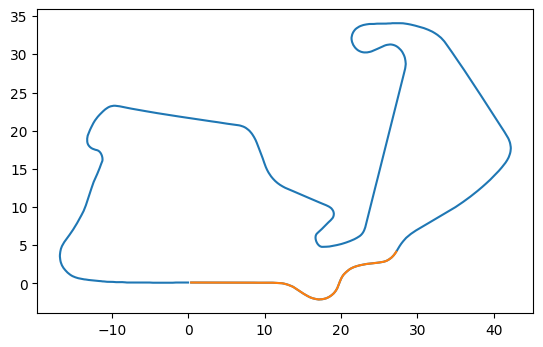

In [14]:
x_array = centre_interpolant.lut_x(s_array).full()
y_array = centre_interpolant.lut_y(s_array).full()

plt.figure()
plt.plot(centre_line.path[:, 0], centre_line.path[:, 1])
plt.plot(x_array, y_array)
plt.gca().set_aspect('equal', adjustable='box')